In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from prettytable import PrettyTable

In [2]:
with open('test_dataset.pickle', 'rb') as test_file:
    test_data = pickle.load(test_file)

In [3]:
with open('train_dataset.pickle', 'rb') as train_file:
    train_data = pickle.load(train_file)

In [4]:
shuffled_data = np.random.permutation(train_data)
split_data = np.array_split(shuffled_data, 20)

In [5]:
bias_arr = []
bias2_arr = []
variance_arr = []
irr_err_arr = []
mse_arr = []

In [6]:
# x_test = test_data[:, 0].reshape(-1, 1)
# print(x_test)
y_test = test_data[:, 1]
# poly = PolynomialFeatures(degree=15)
# x_test_poly = poly.fit_transform(x_test)

In [7]:
# y_pred_val = [[0 for x in range(20)] for y in range(200)]
# Make a model for the class of polynomial functions of degree k
for k in range(1, 16):
    bias = 0
    variance = 0
    mse = 0
#     irr_err = 0
    # irr_err = 1
    poly = PolynomialFeatures(degree=k)
    x_test = poly.fit_transform(test_data[:, 0].reshape(-1, 1)) # DON'T CHANGE
    # Iterate through the 200 test points
    e1 = np.zeros(200)
    y_pred_val = np.zeros((200, 20))
    for i in range(20):
        x_train = poly.fit_transform(split_data[i][:, 0].reshape(-1, 1))
        y_train = split_data[i][:, 1]
        model = LinearRegression().fit(x_train, y_train)
        y_pred_val[:, i] = model.predict(x_test)
        e1 += (y_test - y_pred_val[:, i]) ** 2
    e1 = e1 / 20
    y_pred_avg = np.mean(y_pred_val, axis=1)
    bias = np.mean(abs(y_test - y_pred_avg))
    bias2 = np.mean((y_test - y_pred_avg)**2)
    variance = np.mean(np.mean((y_pred_val - np.mean(y_pred_val, axis=1).reshape(-1, 1)) ** 2))
    irr_err = np.mean(e1 - (y_test - y_pred_avg)**2 - np.mean((y_pred_val - np.mean(y_pred_val, axis=1).reshape(-1, 1)) ** 2))
    mse = np.mean(e1)
    print("Degree: " + str(k) + " Bias: " + str(bias) + " Variance: " + str(variance) + " Irr_err: " + str(irr_err) + " MSE: " + str(mse))
    bias_arr.append(bias)
    variance_arr.append(variance)
    irr_err_arr.append(irr_err)
    mse_arr.append(mse)
    bias2_arr.append(bias2)

Degree: 1 Bias: 0.2700502817550129 Variance: 0.004968065286228395 Irr_err: 4.649058915617843e-18 MSE: 0.11914989028739484
Degree: 2 Bias: 0.08713397995194551 Variance: 0.0009990132973291244 Irr_err: -1.6978606021123e-18 MSE: 0.013085427518251685
Degree: 3 Bias: 0.03355034041908128 Variance: 0.0004000606866160792 Irr_err: -4.3018431698793604e-18 MSE: 0.005111520038056329
Degree: 4 Bias: 0.025319320772318445 Variance: 0.0005290058323762087 Irr_err: 1.990595188683386e-18 MSE: 0.004788940173793375
Degree: 5 Bias: 0.02478712038269821 Variance: 0.0007107722655685374 Irr_err: -1.3183898417423734e-18 MSE: 0.0049189292463143915
Degree: 6 Bias: 0.02570185112911134 Variance: 0.0013449590791322246 Irr_err: -2.7408630920433553e-18 MSE: 0.005585226733653675
Degree: 7 Bias: 0.02637777756464665 Variance: 0.0012370428517002301 Irr_err: -2.3418766925686897e-19 MSE: 0.005459689054647849
Degree: 8 Bias: 0.026793738785334274 Variance: 0.001428020830344407 Irr_err: 4.111294638065033e-18 MSE: 0.0057030596026

In [8]:
degrees = np.arange(1,16)
table = PrettyTable()
table.add_column("Degree", degrees)
table.add_column("Bias", bias_arr)
table.add_column("Variance", variance_arr)
print(table)

+--------+----------------------+-----------------------+
| Degree |         Bias         |        Variance       |
+--------+----------------------+-----------------------+
|   1    |  0.2700502817550129  |  0.004968065286228395 |
|   2    | 0.08713397995194551  | 0.0009990132973291244 |
|   3    | 0.03355034041908128  | 0.0004000606866160792 |
|   4    | 0.025319320772318445 | 0.0005290058323762087 |
|   5    | 0.02478712038269821  | 0.0007107722655685374 |
|   6    | 0.02570185112911134  | 0.0013449590791322246 |
|   7    | 0.02637777756464665  | 0.0012370428517002301 |
|   8    | 0.026793738785334274 |  0.001428020830344407 |
|   9    | 0.027058233001464115 | 0.0018892283979180197 |
|   10   | 0.030532351495954645 |  0.006204319195274054 |
|   11   | 0.035807725305815795 |  0.015454476604160732 |
|   12   | 0.030942935029649163 |  0.018888775942590898 |
|   13   | 0.03998823964992333  |  0.04386978290150566  |
|   14   | 0.03699954971546746  |   0.3337357903703329  |
|   15   | 0.0

In [9]:
table = PrettyTable()
table.add_column("Degree", degrees)
table.add_column("Irreducible Error", irr_err_arr)
print(table)

+--------+-------------------------+
| Degree |    Irreducible Error    |
+--------+-------------------------+
|   1    |  4.649058915617843e-18  |
|   2    |   -1.6978606021123e-18  |
|   3    | -4.3018431698793604e-18 |
|   4    |  1.990595188683386e-18  |
|   5    | -1.3183898417423734e-18 |
|   6    | -2.7408630920433553e-18 |
|   7    | -2.3418766925686897e-19 |
|   8    |  4.111294638065033e-18  |
|   9    |  2.5500435096859064e-18 |
|   10   |  2.7755575615628914e-19 |
|   11   | -1.3877787807814457e-17 |
|   12   |  2.7755575615628915e-18 |
|   13   | -2.2204460492503132e-17 |
|   14   |  4.4408920985006264e-17 |
|   15   |  1.5987211554602254e-16 |
+--------+-------------------------+


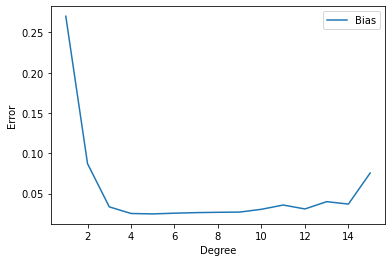

In [10]:
degrees = np.arange(1,16)
plt.plot(degrees, bias_arr, label='Bias')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

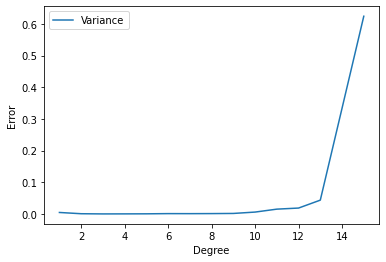

In [11]:
degrees = np.arange(1,16)
plt.plot(degrees, variance_arr, label='Variance')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()

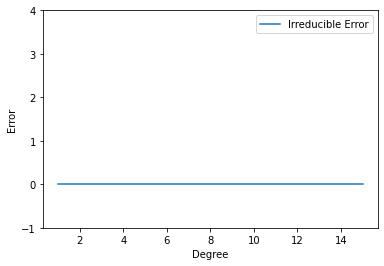

In [12]:
degrees = np.arange(1,16)
plt.plot(degrees, irr_err_arr, label='Irreducible Error')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Error')
plt.ylim(-1, 4)
plt.show()

In [13]:
bias_sq_arr = [0] * 10
for i in range (10):
    bias_sq_arr[i] = bias2_arr[i]
var_plot_arr = [0] * 10
for i in range(10):
    var_plot_arr[i] = variance_arr[i]
mse_plot_arr = [0] * 10
for i in range(10):
    mse_plot_arr[i] = mse_arr[i]

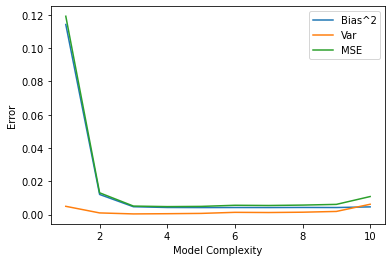

In [14]:
degree_10 = np.arange(1,11)
plt.plot(degree_10, bias_sq_arr,label='Bias^2')
plt.plot(degree_10, var_plot_arr, label='Var')
plt.plot(degree_10, mse_plot_arr, label='MSE')
plt.legend()
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.show()